# Atmospheric* Data Science Workshops
<div style="text-align: right"> *and oceanic </div>

## Python : xArray and multidimensionnal gridded data

Pascal Bourgault, 05-04-2019
Kyle Gorkowski, 2022


In this workshop we will use `xArray` and friends to read, analyse, plot and write multidimensionnal gridded data.

- `xArray` is built on `Pandas`, a lot of the functionalities are similar and use similar syntax.
- It is coded to follow the [CF conventions](http://cfconventions.org/), the same that define de `netCDF` format, making fully compatible with `nc` files.
- We can already read `netCDF` files to `numpy` arrays through  `scipy` or `netCDF4`, but `xArray` unleashes Python's power and blends in with `matplotlib` and `pandas` to offer a **perfect** data exploration tool for the natural sciences.

`xArray` doesn't come with the default anaconda distribution, we install it first! I reccommend using the anaconda navigator or a terminal, but you can run the following line if you feel adventurous:

In [2]:
#!conda install xarray
#!pip install xarray

Now we can import what we will need for the first part:

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Opening and selecting

In [4]:
data = xr.open_dataset('precip_combined.nc')

`xArray` mainly uses two objects : `DataArray` and `Dataset`.

 - A `DataArray` is a named N-D array with named axes or *dimensions* that can have values, making them *coordinates*.
 - A `Dataset` contains many `DataArray` instances. If a `DataArray` as only one dimension, it can be promoted to a coordinate. 
 By default, a `DataArray` with the same name as its dimension is automatically promoted to coordinate.

 - Both can have any number of *attributes*. The CF conventions regulate some of them. Most important for us are : `units` and `long_name` (or `standard_name` if the latter is absent).

In [5]:
data

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 1461)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

In [6]:
data

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 1461)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2014-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

The values are stored as a numpy array:

In [7]:
data.time.values

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2014-12-30T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

The attributes are stored in an *ordered* dictionary, so we can modify them as we would a dict!

In [8]:
data.lat.attrs['units'] = '°N'  # By the bracket-getter
data.lon.attrs.update(units='°W') # My favorite : by the update() method.
data.lon

<xarray.DataArray 'lon' (lon: 300)>
array([230.125, 230.375, 230.625, ..., 304.375, 304.625, 304.875],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
Attributes:
    units:          °W
    long_name:      Longitude
    actual_range:   [230.125 304.875]
    standard_name:  longitude
    axis:           X

Most of the data exploration can be done in one-liners. First useful functions `.sel()` and `.isel()` to select data based on the coordinates *or* the indexes.

In [9]:
# We can use keywords with lists, scalars or slices
from datetime import datetime
data['precip'].sel(lat=40, lon=270, time=datetime(2011, 1, 1), method='nearest').values

array(17.28125)

### Simple plotting

With the help of the `.plot()` function, visualisation of data has never been this easy!

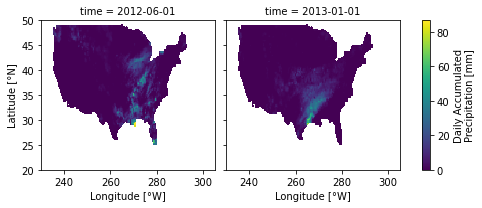

In [12]:
data.precip.sel(time=[datetime(2012, 6, 1), datetime(2013, 1,1)]).plot(col='time', col_wrap=2)

`.plot()` automatically chooses the plot type based on the number dimensions. 

 - 2D -> polormesh
 - 1D -> lines
 - ND -> histogram
 
 But you can access other types (contour, imshow, step).
 
 Most of the plot control is done through keywords.
 
The colormaps can be changed. By default, xarray checks if 0 is in the value range, if it is, it uses the Red-Blue divergent colormap, if not, the default sequential viridis.

To see the low details more, we can cut out the extreme values:

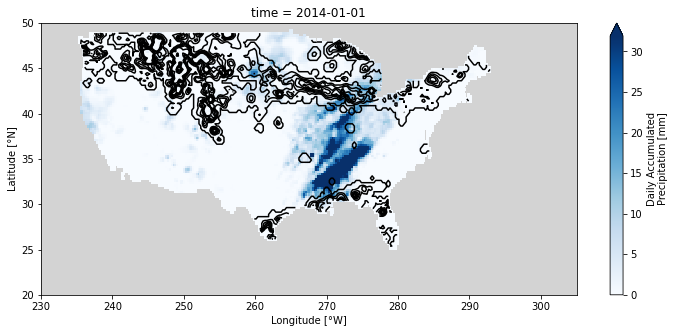

In [88]:
fig = plt.figure(figsize=(12, 5)) # Create an empty figure so we can choose it's size
data.precip.sel(time=datetime(2011, 1, 1)).plot(robust=True, cmap='Blues')
data.precip.sel(time=datetime(2014, 1, 1)).plot.contour(robust=True, colors='k')
plt.gca().set_facecolor('lightgrey')

Faces can be down selected.
method 'nearest' makes the selection more flexible.

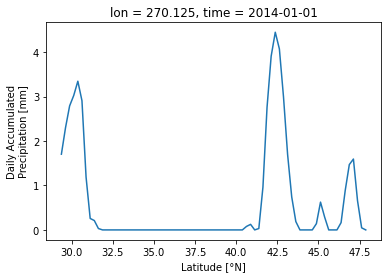

In [43]:
data.precip.sel(time=datetime(2014, 1, 1), lon=270, method='nearest').plot()

Same story with line plots and `hue`:

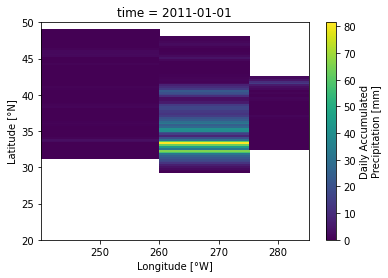

In [89]:
data.precip.sel(time=[datetime(2011, 1, 1)], lon=[250, 270, 280], method='nearest').plot(col='lon')

In [90]:
data.precip.sel( lat=np.arange(20, 50, 5), method='nearest').max('lon').plot(col='time')

KeyboardInterrupt: 

ValueError: Image size of 315648x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 315648x216 with 856 Axes>

Also powerful, the possibility to group values in bins :

In [ ]:
data.salinity_change.sel(depth=[0, 20, 200]).groupby_bins('latitude', 10).mean(['latitude', 'longitude']).plot(hue='depth')

Or a running mean:

In [ ]:
data.salinity_mean.sel(depth=[0, 20, 200]).mean('longitude').rolling(latitude=10, center=True).mean().plot(hue='depth')

In the idea of keeping a single idea writable in a single line, `dataset`s and `DataArray`s provide the useful `.pipe()` method allowing apply a function on itself.

For example, this could be useful for a unit transformation, when you don't want to create a new array just for this.

In [ ]:
data.thetao_mean.sel(latitude=-60).pipe(lambda x: x + 273.15).plot(y='depth', yincrease=False,
                                                                   center=273.15, robust=True,
                                                                   cbar_kwargs={'label':r'$\overline{\theta}$ [K]'})
# Equivalent to
# theta_kelvin = data.thetao_change.sel(longitude=200) + 273.15
# theta_kelvin.plot(...)

And many more. Very useful can be the `.interp()` and `.interpolate_na()` methodes to interpolate to new coordinates (needs `scipy` installed). Not showns here but good examples are available in [the documentation](http://xarray.pydata.org/en/stable/interpolation.html)

### Combining and adding variables

We use this dumb linear EOS to compute our mean potential density:

\begin{equation}
    \sigma = \sigma_0\left( 1 - \alpha (T - T_0) + \beta (S - S_0)\right)
\end{equation}

With $\sigma_0 = 1028$ kg/m³, $\alpha = 2\times 10^{-4}$ K$^{-1}$, $T_0 = 10$°C, $\beta = 7\times 10^{-4}$ and $S_0 = 35$ g/kg.

In [ ]:
fake_sigma = 1028 * (1 - 2e-4 * (data.thetao_mean - 10) + 7e-4 * (data.salinity_mean - 35))

In [ ]:
fake_sigma

In [ ]:
fake_sigma.attrs.update(units='kg/m³', long_name='Dumb potential density')
fake_sigma

In [ ]:
fake_sigma.sel(latitude=[-70, 0, 70]).mean('longitude').plot(y='depth', yincrease=False, hue='latitude')

In xArray, datasets are non-mutable, meaning you normally cannot modify it inplace. Most methods return copies and so we usually reassign to the same variable name.

In [ ]:
data = data.assign(sigma=fake_sigma)

In [ ]:
data.to_netcdf('Ocean_changes_with_density.nc')

In [ ]:
!ls -alh *.nc

## Exercices

### 1.
Show the meridional mean salinity change of the southern ocean, but only where the temperature change was negative. (Let's define the Southern Ocean as everything below 40°S)

## Bonus One : Maps

xArray integrates correctly with Python's main mapping package : [Cartopy](https://scitools.org.uk/cartopy/).
Cartopy is the Phenix that remerged from the defunct basemap. It is used seemingly the same way and is fully integrated to matplotlib.

It's not installed with the default anaconda, so we risk our system integrity and run:

In [ ]:
#! conda install -c conda-forge cartopy

In [ ]:
import cartopy.crs as ccrs

Cartopy adds a "projection" to your classic Matplotlib axes and ask for "transform"s to be able to plot data.

Because we are heartless heretics, we will use Mercator:

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Mercator(min_latitude=-70, max_latitude=70)},
                       figsize=(15, 6))
data.salinity_change.isel(time=0, depth=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), robust=True)
#data.thetao_change.isel(time=0, depth=0).plot.contour(ax=ax, transform=ccrs.PlateCarree(), robust=True, cmap=plt.cm.BrBG)
ax.coastlines()

## Bonus Two : Parallel and memory-safe computing

Here we use dask, the under-the-hood friend of xArray, to do operations in parallel. Or, even more interestingly, on datasets larger than what our RAM allows.

When you open a multi-file dataset with xArray, it uses dask by default. Instead of reading in all values of all variables, it only reads the metadata and stores the information in dask arrays lazily. Meaning, the values will only be read from the file if you need them. By default, each different file is stored in a different "chunk", but this behavior can be modified and the data chunked at will.

Furthermore, when computing things, the process is done chunk by chunk. So you only need enough ram to store one chunk. And it can do operations on more than one chunk at a time!

In [ ]:
#! conda install dask

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
d = xr.open_mfdataset('so_Omon_ORAreanalysis_ORAS4*')
d

In [ ]:
%time
a = d.so.rolling(time=3, center=True).construct('roll').dot(xr.DataArray([0.25, 0.5, 0.25], name='weights', dims=['roll'])).mean('lon')

In [ ]:
with ProgressBar():
    out = a.compute()

In [ ]:
out.sel(time='1985-05').plot(robust=True, yincrease=False)